In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
class ADALINE:
    
    def __init__(self, eta=0.01, n_iters=400):
        self.eta = eta
        self.n_iters = n_iters
        
        
    def shuffle(self, X, y):
        idx = np.random.permutation(len(y))
        return X[idx], y[idx]
        
        
    def net_input(self, X):
        return np.dot(X, self.w_)
    
    
    def activate(self, X):
        return self.net_input(X)
    
    
    def predict(self, X):
        return np.where(self.activate(X) >= 0, 1, -1)
    
    
    def update_weights(self, x, y_tar):
        error = y_tar - self.activate(x)
        self.w_ += self.eta * x.dot(error)
        return (error**2).sum() / 2.0
    
    
    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1])
        self.costs_ = []
        
        for i in range(self.n_iters):
            costs = []
            X, y = self.shuffle(X, y)
            
            for xi, target in zip(X, y):
                costs.append(self.update_weights(xi, target))
            
            #to add costs every 20 iterations
            if i%20 == 0:
                avg_cost = np.mean(costs)
                self.costs_.append(avg_cost)

In [3]:
#function to load breast cancer data
def load_data():
    from sklearn.datasets import load_breast_cancer
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    
    X, y = load_breast_cancer(return_X_y=True)
    y[y == 0] = -1
    
    sc = StandardScaler()
    X_std = sc.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=17)
    return X_train, X_test, y_train, y_test

In [4]:
#get train/test sets
X_train, X_test, y_train, y_test = load_data()

In [5]:
#train ADALINE and print obtained accuracies
clf = ADALINE(eta=0.001, n_iters=2000)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(f'Accuracy on train data: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy on test data: {accuracy_score(y_test, y_test_pred)}')

Accuracy on train data: 0.9773869346733668
Accuracy on test data: 0.9649122807017544


Text(0, 0.5, 'Cost')

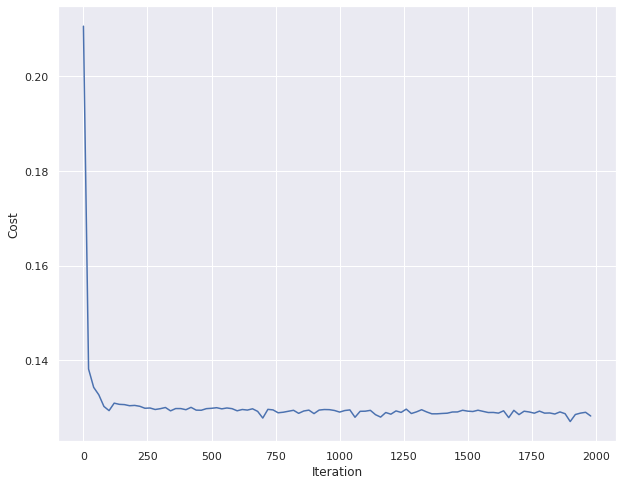

In [6]:
#plot learning curve
plt.figure(figsize=(10, 8))
plt.plot(range(0, len(clf.costs_)*20, 20), clf.costs_)
plt.xlabel('Iteration')
plt.ylabel('Cost')

<AxesSubplot:>

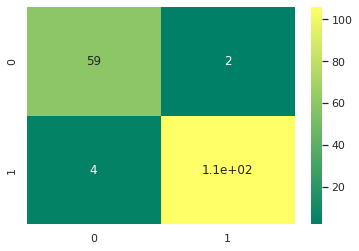

In [7]:
#build confusion matrix
conf_matr = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matr, cmap='summer', annot=True, cbar=True)

In [8]:
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.94      0.97      0.95        61
      Benign       0.98      0.96      0.97       110

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

